In [ ]:
import numpy as np
import scipy.stats as ss

from multiinstance.density_ratio_em import generateBags, DensityRatioEM


import matplotlib.pyplot as plt

from easydict import EasyDict

In [ ]:
class Mixture:
    def __init__(self, phi, pi):
        self.phi = phi
        self.pi = np.array(pi)
    def pdf(self,x):
        return np.array([np.dot(self.pi, [phi_i.pdf(xi) for phi_i in self.phi]) for xi in x])
    def rvs(self,size):
        n = np.round(self.pi * size).astype(int)
        x = np.zeros((0,1))
        for phi,ni in zip(self.phi, n):
            x = np.concatenate((x, phi.rvs(ni)[:,None]))
        return x,n

In [ ]:
k0P,k1P = ss.norm(loc=-1,scale=1), ss.norm(loc=10,scale=1)
k0N,k1N = ss.norm(loc=-4,scale=1),ss.norm(loc=7,scale=1)

In [ ]:
bags = generateBags(2, NPos=1000, NUnlabeled=10000,
                    pos_means=[[k0P.mean()], [k1P.mean()]],
                    neg_means=[[k0N.mean()],[k1N.mean()]],
                    pos_covs=[k0P.var(), k1P.var()], 
                    neg_covs=[k0N.var(), k1N.var()],)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/8623 [00:00<?, ?it/s]

  0%|          | 0/1377 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/700 [00:00<?, ?it/s]

  0%|          | 0/9300 [00:00<?, ?it/s]

In [ ]:
drem = DensityRatioEM(bags, 2)

transforms and class prior estimation:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0.9830144856795537
0.9783686145089937
0.9847155770571704


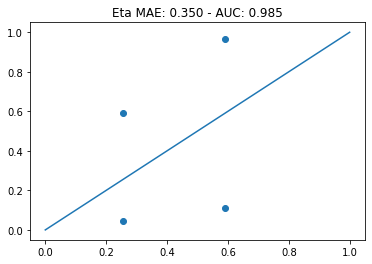

  0%|          | 0/50 [00:00<?, ?it/s]

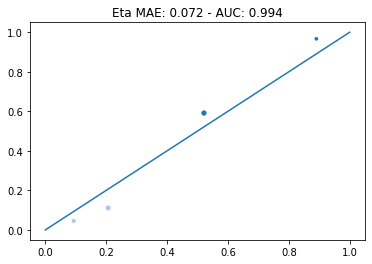

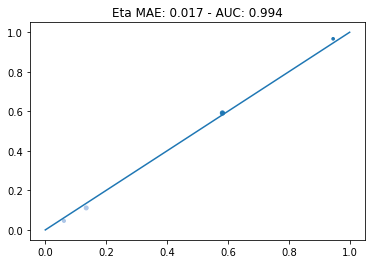

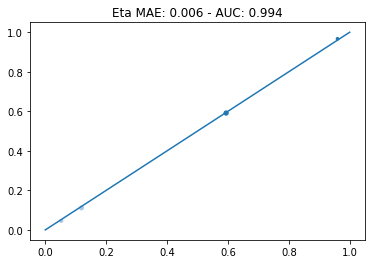

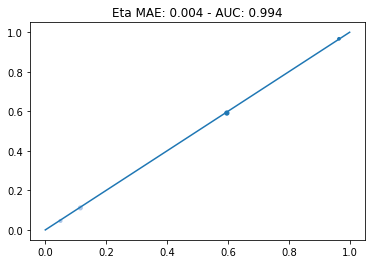

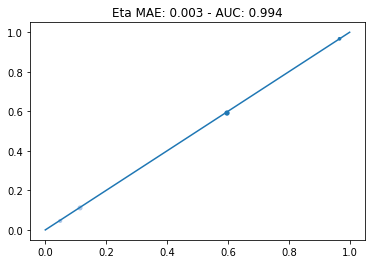

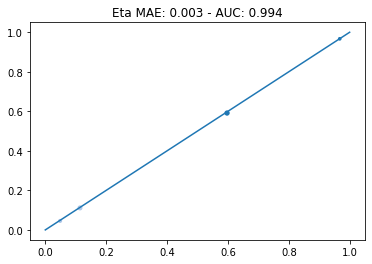

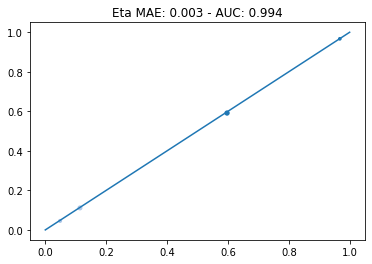

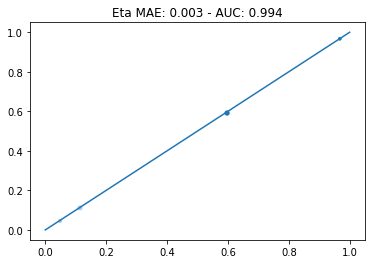

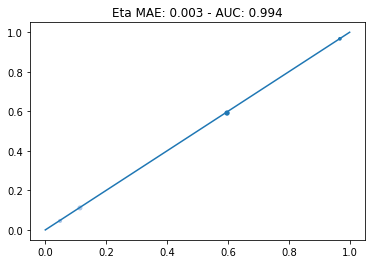

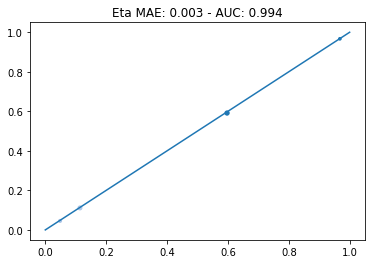

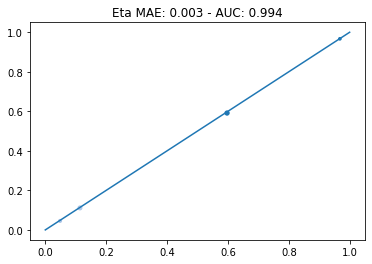

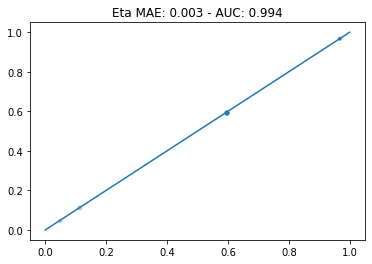

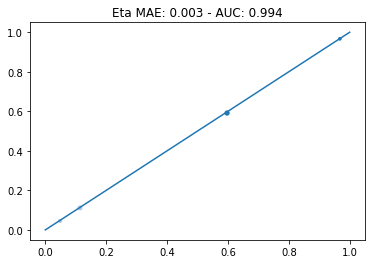

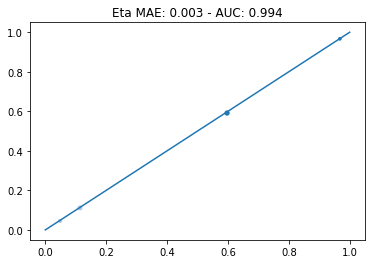

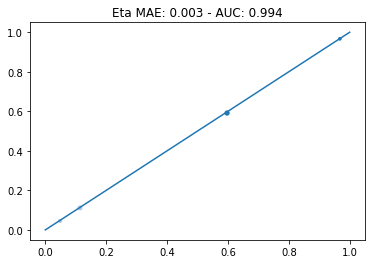

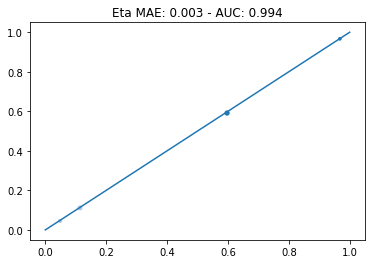

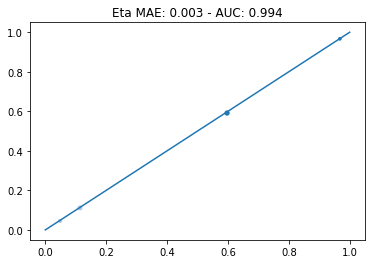

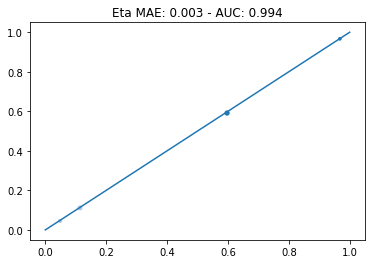

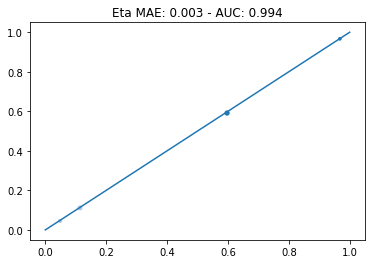

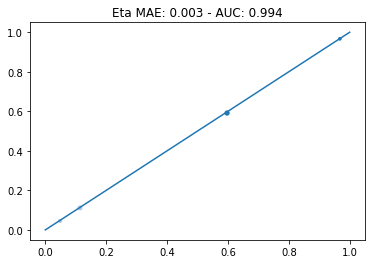

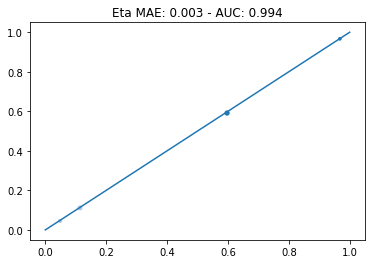

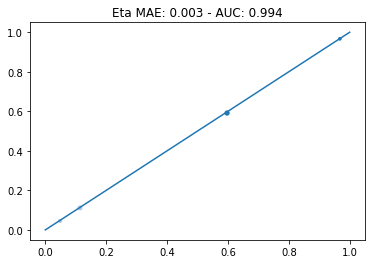

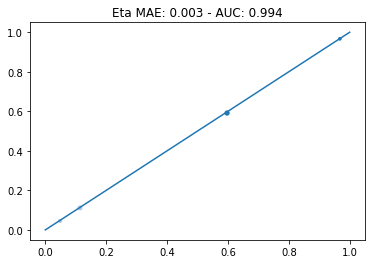

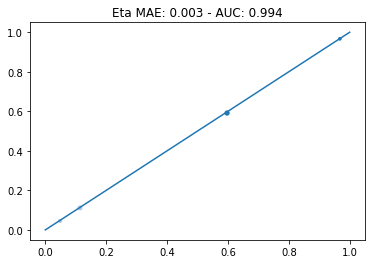

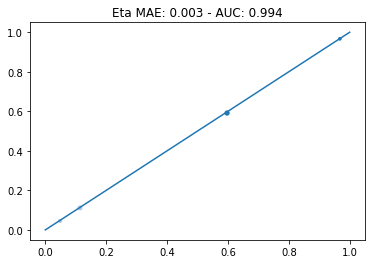

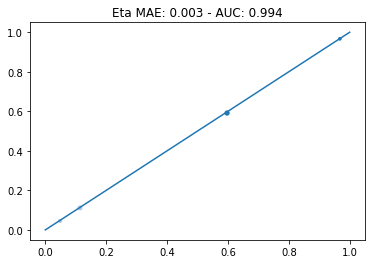

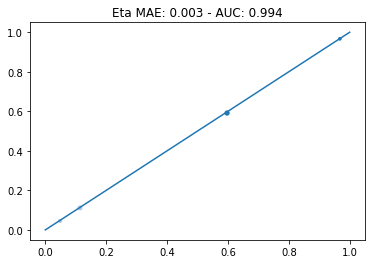

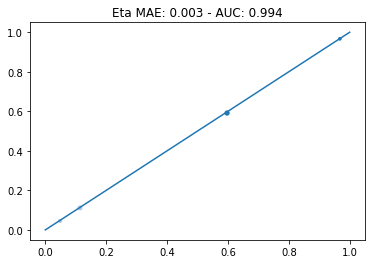

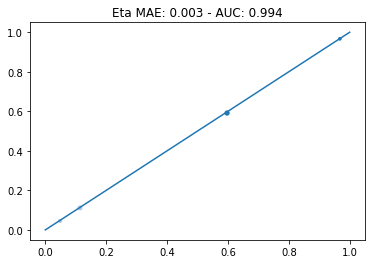

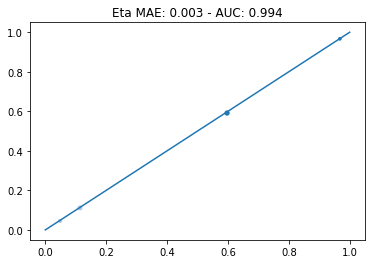

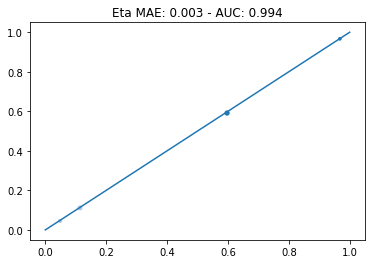

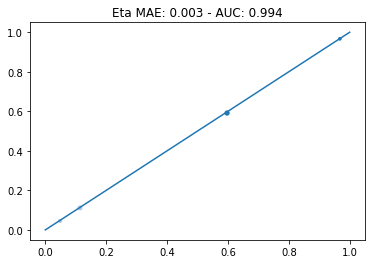

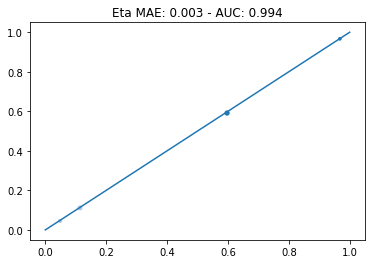

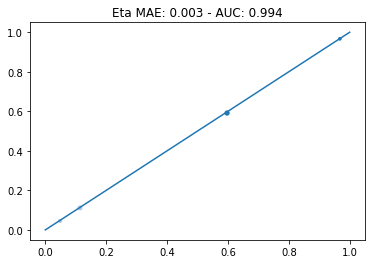

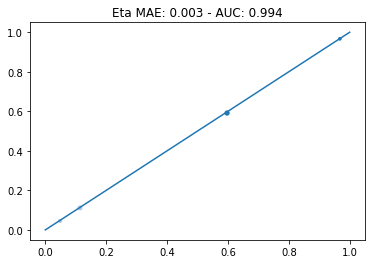

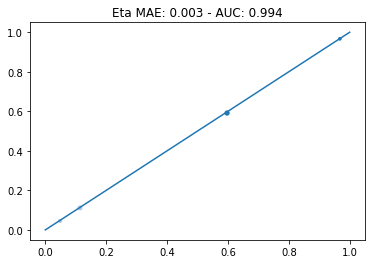

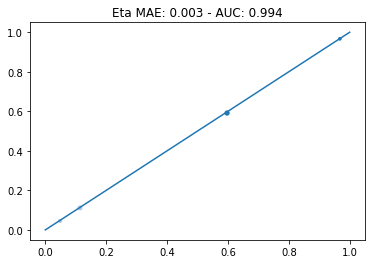

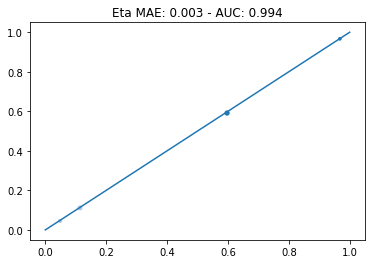

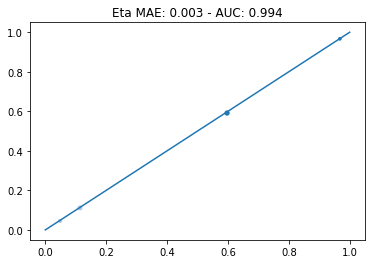

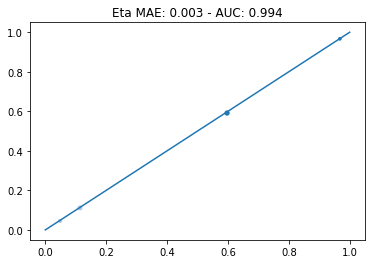

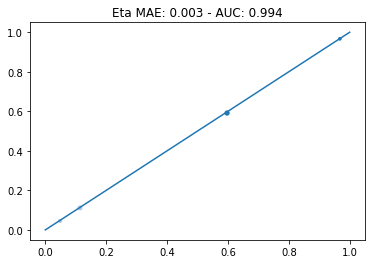

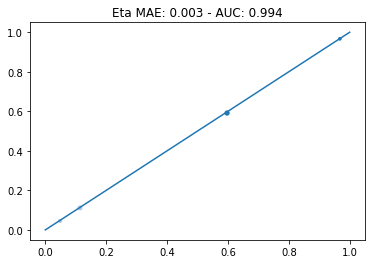

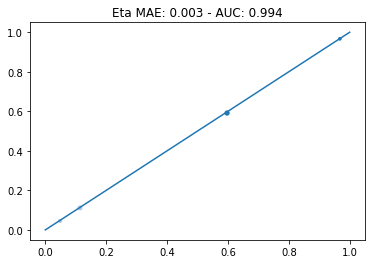

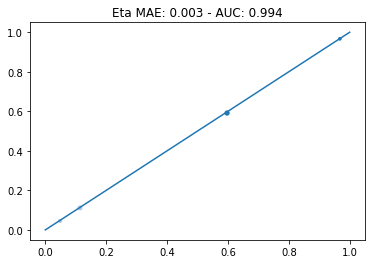

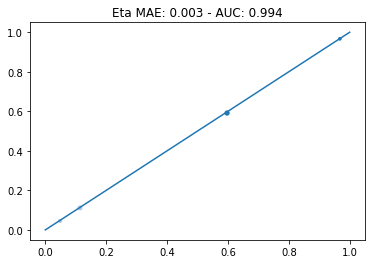

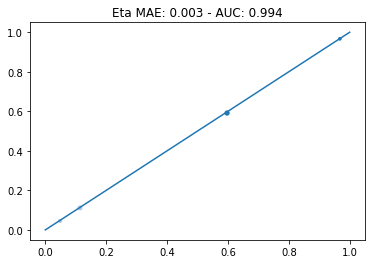

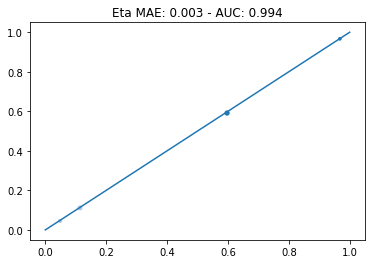

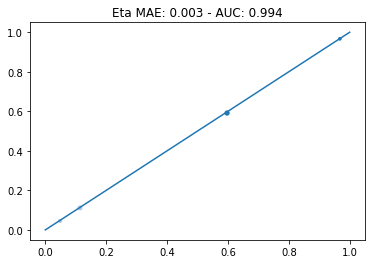

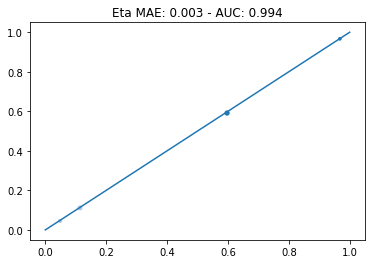

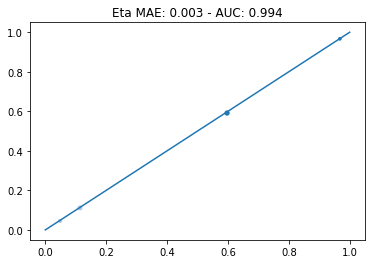

In [ ]:
drem.run("true posterior",componentInfo=EasyDict(d={
    "posMeans": [[k0P.mean()], [k1P.mean()]],
    "negMeans": [[k0N.mean()],[k1N.mean()]],
    "posCovs": [k0P.var(), k1P.var()], 
    "negCovs": [k0N.var(), k1N.var()],
    "dgs": [None, None],
    "rs": [None,None]}))

In [ ]:
f1 = Mixture([k0P,k1P],bags[0].pi)

f0 = Mixture([k0N, k1N],bags[0].rho)

c0 = Mixture([k0P, k0N],[bags[0].eta[0], 1 - bags[0].eta[0]])

c1 = Mixture([k1P,k1N],[bags[0].eta[1], 1 - bags[0].eta[1]])
alpha = bags[0].alpha
posterior = lambda a,x,f0_,f1_: a / (a + (1 - a) * f0_.pdf(x)/f1_.pdf(x))

# Old Equations

$f_1(x) = .6 * \phi^+_0(x) + .4 * \phi^+_1(x)$

$f_0(x) = .25 * \phi^-_0(x) + .75 * \phi^-_1(x)$

$f(x) = .25 * [.6 * \phi^+_0(x) + .4 * \phi^+_1(x)] + .75 * [.25 * \phi^-_0(x) + .75 * \phi^-_1(x)$]$

$f(x) = .15 * \phi^+_0(x) + .1 * \phi_1^+(x) + 0.1875 * \phi^-_0(x) + 0.5625 * \phi^-_1(x)$

$\gamma_0 = .25 * .6 + .75 * .25 = 0.3375$

$\gamma_1 = .25 * .4 + .75 * .75 = 0.6625$

$f(x) = .3375 [0.44 * \phi_0^+(x) + 0.56 * \phi_0^-(x)] + 0.6625 [0.15 * \phi_1^+(x) + 0.85 * \phi_1^-(x)]$

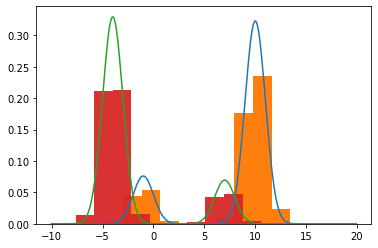

In [ ]:
rng = np.arange(-10,20,.1)
plt.plot(rng,f1.pdf(rng))
plt.hist(f1.rvs(10000)[0].ravel(),density=True)
plt.plot(rng,f0.pdf(rng))
_ = plt.hist(f0.rvs(10000)[0].ravel(),density=True,alpha=.95)

# Cluster 0 EM Run

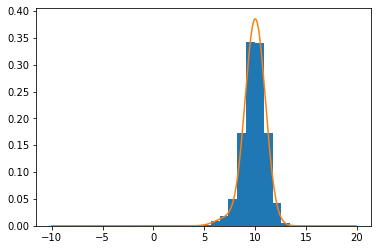

In [ ]:
plt.hist(bags[0].x_unlabeled[drem.bags[0].unlabeled_cluster_assignment == 0],density=True)
# plt.plot(rng,c0.pdf(rng))
plt.plot(rng,c1.pdf(rng))

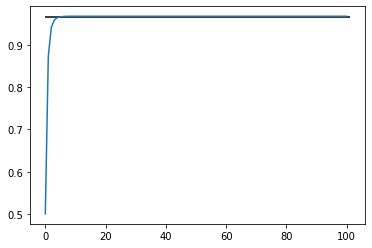

In [ ]:
a = .5
vals = [a]
for _ in range(100):
    a = np.mean(posterior(a,bags[0].x_unlabeled[drem.bags[0].unlabeled_cluster_assignment == 0],
                         k1N, k1P))
    vals.append(a)
plt.plot(vals)
# plt.hlines(bags[0].eta[0],0,len(vals))
plt.hlines(bags[0].eta[1],0,len(vals))

In [ ]:
a

0.9678779137541831

# Cluster 1 EM Run

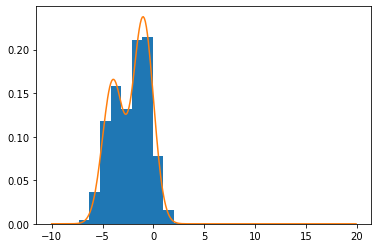

In [ ]:
plt.hist(bags[0].x_unlabeled[drem.bags[0].unlabeled_cluster_assignment == 1],density=True)
plt.plot(rng,c0.pdf(rng))
# plt.plot(rng,c1.pdf(rng))

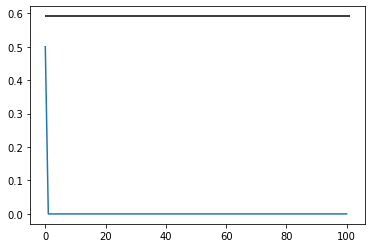

In [ ]:
a = .5
vals = [a]
for _ in range(100):
    a = np.mean(posterior(a,bags[0].x_unlabeled[drem.bags[0].unlabeled_cluster_assignment == 1],
                         k1N, k1P))
    vals.append(a)
plt.plot(vals)
plt.hlines(bags[0].eta[0],0,len(vals))
# plt.hlines(bags[0].eta[1],0,len(vals))

In [ ]:
a

0.0